In [16]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
from dataset_loading import CocoLoader
import pycocotools
import math


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
coco=CocoLoader() #TODO: can add config here?
transforms = None
loader,data,api = coco.load_train(transformations=transforms) 


loading annotations into memory...
Done (t=16.04s)
creating index...
index created!
loading annotations into memory...
Done (t=18.34s)
creating index...
index created!


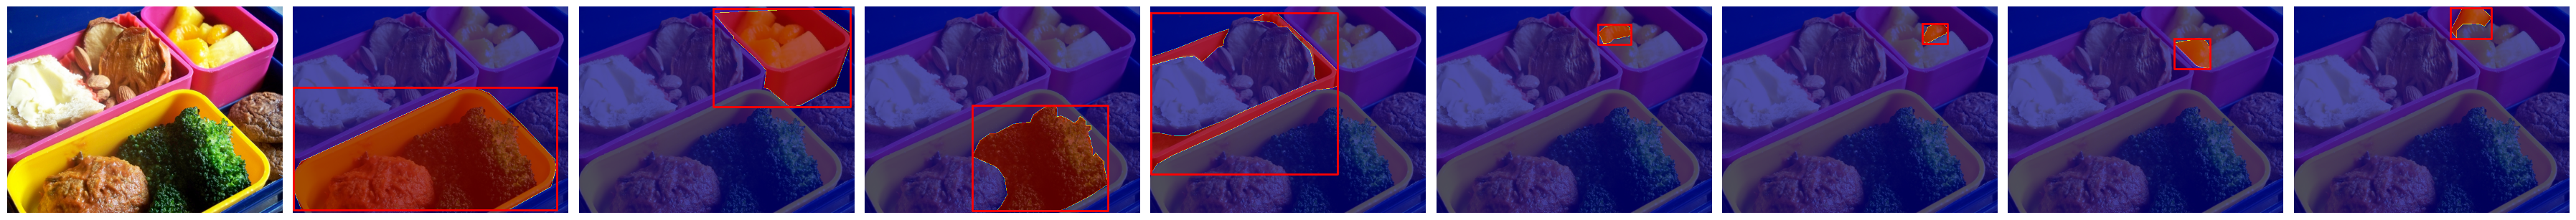

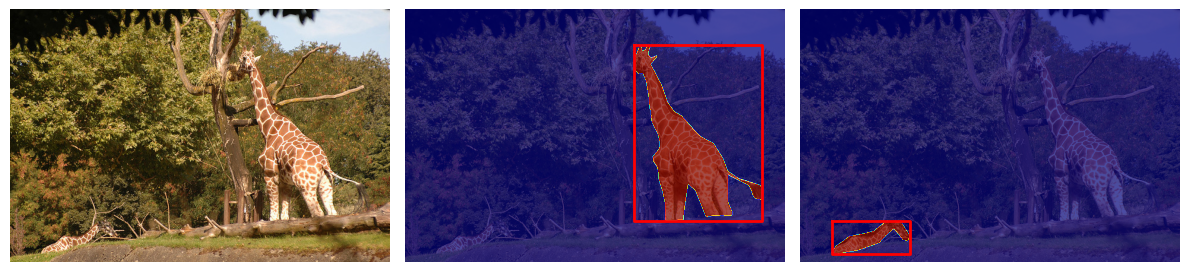

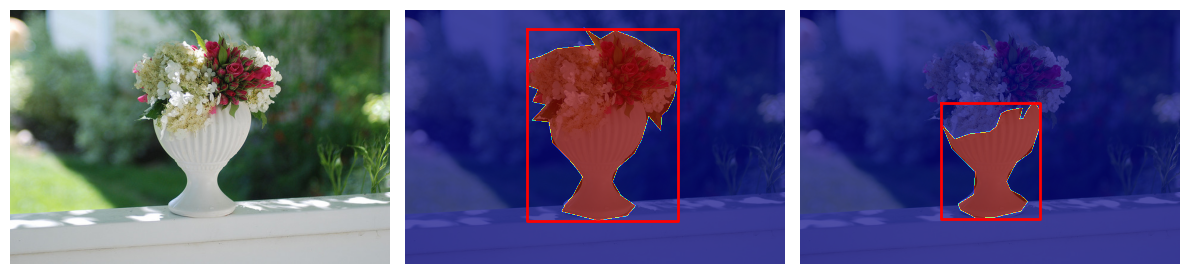

In [29]:
images_to_show =3

scale=4

for i in range(images_to_show):
    item = data[i]
    img = item[0]
    metadata = item[1]

    num_imgs = len(metadata)+1
    fig, axes = plt.subplots(1, num_imgs, figsize=(num_imgs * scale,  scale))
    axes=axes.flatten()

    for i,ax in enumerate(axes):
        if i==0: #straight up image
            ax.imshow(img)
            ax.axis('off')

        else: #masks
            rle = metadata[i-1]
            mask = api.annToMask(rle)
            ax.axis('off')
            ax.imshow(img)
            ax.imshow(mask, cmap='jet', alpha=0.7)

            box = rle['bbox']
            ax.plot([box[0], box[0] + box[2], box[0] + box[2], box[0], box[0]],
                    [box[1], box[1], box[1] + box[3], box[1] + box[3], box[1]],
                    color='red', linewidth=2)
    plt.tight_layout()
    plt.show()



